In [1]:
import ROOT as rt

Welcome to JupyROOT 6.18/04


In [2]:
i = rt.TFile("../online/output/fixed_filter_50_100.root")
i_l = i.Get("h-lambda")
tt = i_l.FindObject("fDphiTriggerTrigger")
canvas = rt.TCanvas("canvas", "Main Canvas", 0, 0, 1920, 1080)

In [18]:
tt.GetAxis(0).SetRangeUser(4, 8)
tt.GetAxis(1).SetRangeUser(4, 8)
tt.GetAxis(2).SetRange(7, 9)

Warning in <TFile::Append>: Replacing existing TH1: fDphiTriggerTrigger_proj_2 (Potential memory leak).


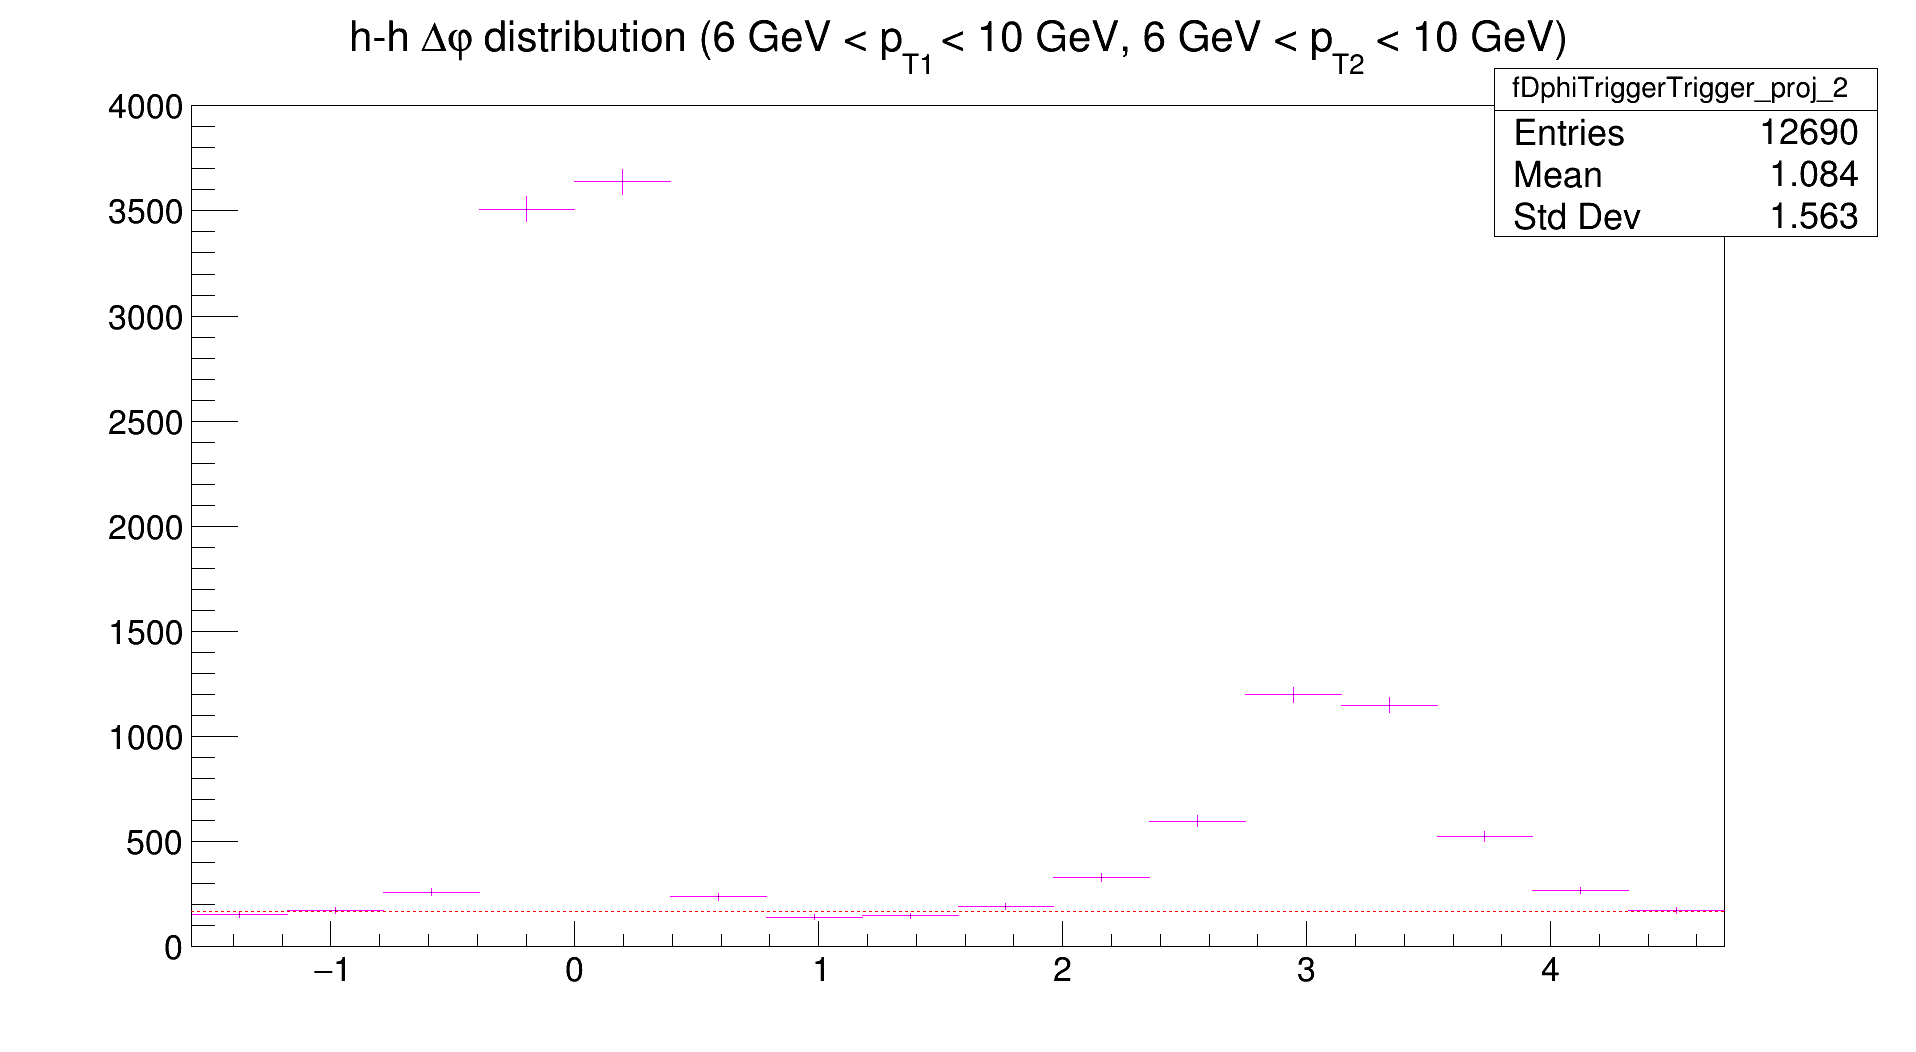

In [11]:
dphi = tt.Projection(2)
dphi.Sumw2()
#dphi.SetTitle("h-h #Delta#varphi distribution (all p_{T})")
dphi.SetTitle("h-h #Delta#varphi distribution (6 GeV < p_{T1} < 10 GeV, 6 GeV < p_{T2} < 10 GeV)")
dphi.SetLineColor(rt.kMagenta)
maximum = dphi.GetMaximum()
dphi.GetYaxis().SetRangeUser(0, maximum*1.1)

avg = (1/4)*(dphi.GetBinContent(1) + dphi.GetBinContent(8) + dphi.GetBinContent(9) + dphi.GetBinContent(16))
line = rt.TLine(-3.14159/2, avg, 3*3.14159/2, avg)
line.SetLineColor(rt.kRed)
line.SetLineStyle(2)
dphi.Draw()
line.Draw("SAME")
canvas.Draw()

In [6]:
near = dphi.Integral(1, 8) - avg*8
away = dphi.Integral(9, 16) - avg*8
UE = avg*16
total = dphi.Integral(1, 16)
print(f"NS:\t{near/total:.3f}")
print(f"AS:\t{away/total:.3f}")
print(f"UE:\t{UE/total:.3f}")

NS:	0.159
AS:	0.080
UE:	0.761


In [21]:
twod_pt = tt.Projection(0, 1)
twod_pt.SetTitle("p_{T1} vs p_{T2} in UE")
twod_pt.SetLineColor(rt.kGreen + 2)

Warning in <TFile::Append>: Replacing existing TH1: fDphiTriggerTrigger_proj_1_0 (Potential memory leak).


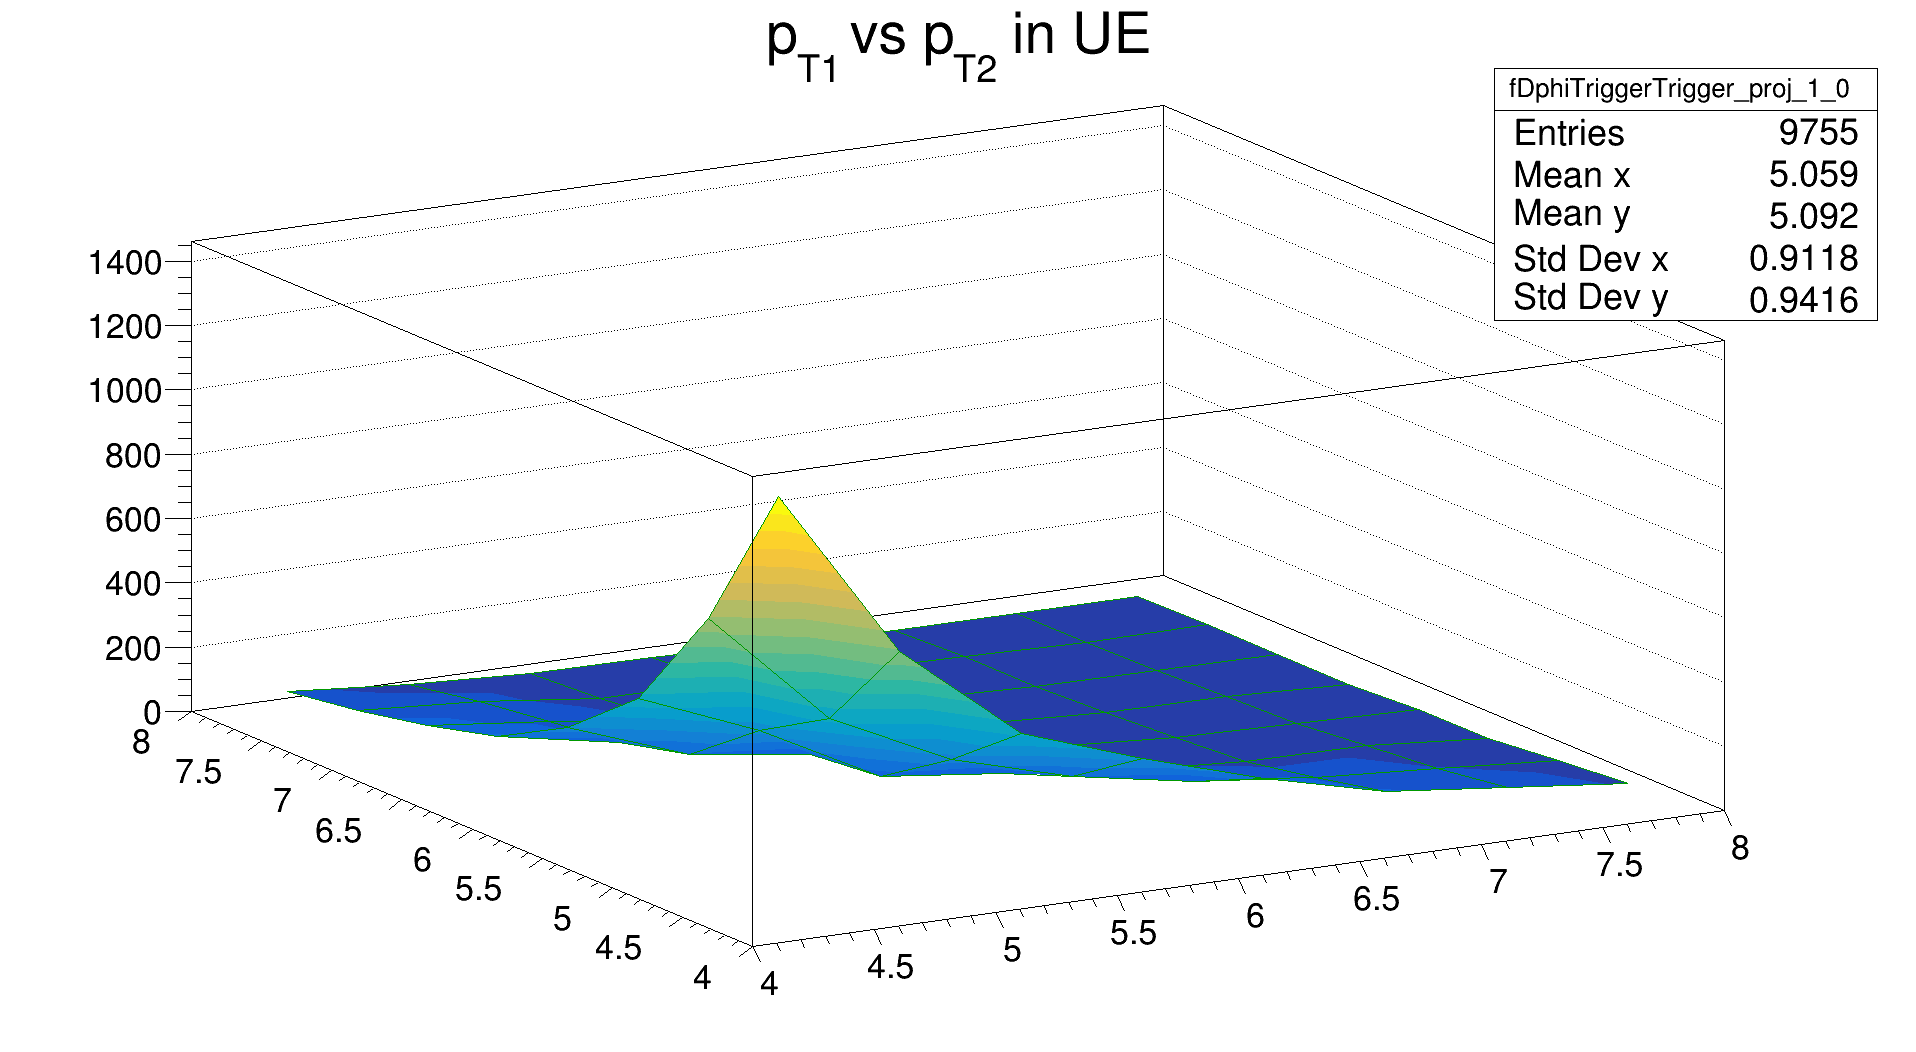

In [22]:
canvas.SetLogz(0)
twod_pt.Draw("SURF1")
canvas.Draw()